In [ ]:

#Manejo de datos
import pandas as pd
import numpy as np

clientes = pd.read_csv("https://raw.githubusercontent.com/adiacla/bigdata/refs/heads/master/Churn_Modelling.csv")
print(f"Fila de clientes: {clientes.shape[0]}\nColumna de clientes: {clientes.shape[1]}\nTamaño del DataFrame {clientes.size}\n\n")
clientes.head()

clientes.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
#Se borraron las columnas 

Fila de clientes: 10002
Columna de clientes: 14
Tamaño del DataFrame 140028




In [ ]:

clientes.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
2,608,Spain,NaN,41.0,1,83807.86,25,0,1,112542.58,0
3,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0


In [24]:
clientes.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
1,619,France,Female,42.0,2,0.00,1,1,1,101348.88,1
2,608,Spain,NaN,41.0,1,83807.86,25,0,1,112542.58,0
3,502,France,Female,42.0,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39.0,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43.0,2,125510.82,1,1,1,79084.10,0
6,645,Spain,Male,44.0,8,113755.78,2,1,0,149756.71,1
7,822,France,Male,50.0,7,0.00,2,1,1,10062.80,0
8,376,Germany,Female,29.0,4,115046.74,4,1,0,119346.88,1
9,501,France,Male,44.0,4,142051.07,2,0,1,74940.50,0


In [46]:
#SIMULAR DATOS

np.random.seed(42)

data = {
    "Estudiantes" : [f"Estudiante {i}" for i in range(1, 21)],
    "Género" : np.random.choice(["Femenino", "Masculino"], size=20),
    "Edad" : np.random.randint(18, 25, size=20),
    "Matematicas" : np.random.normal(70, 10, size=20).round(1),
    "Ciencias" : np.random.normal(63, 15, size=20).round(1),
    "Sociales" : np.random.normal(68, 13, size=20).round(1)
}

df = pd.DataFrame(data)


df["Estudiantes"] = df["Estudiantes"].astype(str)

df.dtypes


Estudiantes     object
Género          object
Edad             int32
Matematicas    float64
Ciencias       float64
Sociales       float64
dtype: object

In [47]:
print(f"Descripcion estadística:\n{df.describe(include=object)}")

Descripcion estadística:
         Estudiantes    Género
count             20        20
unique            20         2
top     Estudiante 1  Femenino
freq               1        13


In [52]:
contarGenero = df["Género"].value_counts()
print(f"Femenino: {contarGenero["Femenino"]}\nMasculino: {contarGenero["Masculino"]}\nTotal: {sum(contarGenero)}")
total = sum(contarGenero)

Femenino: 13
Masculino: 7
Total: 20


In [53]:
print(f"Femenino: {contarGenero["Femenino"]*100/total}\nMasculino: {contarGenero["Masculino"]*100/total}")

Femenino: 65.0
Masculino: 35.0


<BarContainer object of 2 artists>

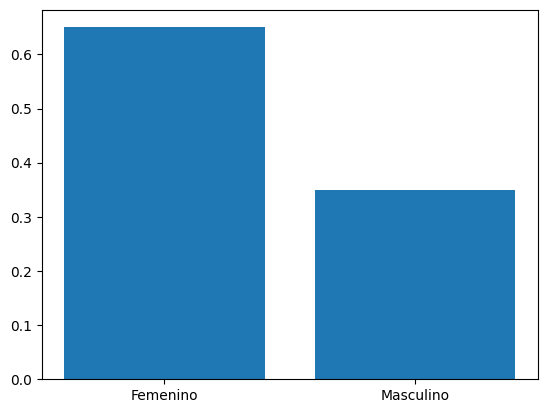

In [54]:
from matplotlib import pyplot as plt

cantidad = df["Género"].value_counts(normalize=True)
plt.bar(cantidad.index, cantidad.values)


<Axes: ylabel='xd'>

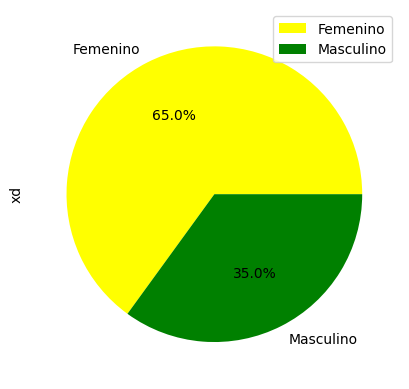

In [ ]:
contarGenero.plot(kind="pie", autopct="%1.1f%%", colors=["yellow", "green"], startangle=0, legend=True, ylabel="Porcentaje de género de alumnos")